As a gamer myself, I know how 'seasonal' online gaming can be, and my objective is to have a precise idea on what could impact the forecast we're about to make.

For this reason, I chose to use Prophet, as it can be fast and exhaustive for the small amount of data that we have.  

Before fitting the model, I started by renaming the columns for prophet.
 
Then added the French holidays to see if they could have had an impact. Even if the data is probably not from the French market specifically, our holidays are more or less the same than the rest of Europe. 

Let see how it goes ;) 

# Imports

In [97]:
from prophet import Prophet
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [98]:
df = pd.read_csv("data_2.csv")

# Transformation 

In [99]:
df["ds"] = pd.to_datetime(df["DAY_ID"], format="mixed")
df["y"] = df["DAU"]

In [100]:
df.head()

,DAY_ID,DAU,ds,y
0,03/01/16,646456,2016-03-01,646456
1,01/01/16,595094,2016-01-01,595094
2,19/01/16,529205,2016-01-19,529205
3,14/01/16,533003,2016-01-14,533003
4,22/01/16,548823,2016-01-22,548823


In [101]:
holidays = pd.DataFrame({
    "holiday": ["Jour de l'an", "Lundi de Pâques", "Fête du travail", "Victoire du 8 mai 1945",
                "Fête nationale", "Assomption", "Toussaint", "Armistice de 1918", "Noël"],
    "ds": pd.to_datetime(["2025-01-01", "2025-04-14", "2025-05-01", "2025-05-08",
                         "2025-07-14", "2025-08-15", "2025-11-01", "2025-11-11", "2025-12-25"])
})

# Model Implementation

In [102]:
model = Prophet(holidays=holidays)

In [103]:
model.fit(df)

20:14:02 - cmdstanpy - INFO - Chain [1] start processing
20:14:02 - cmdstanpy - INFO - Chain [1] done processing


In [104]:
future = model.make_future_dataframe(periods=90, freq="D")

In [105]:
forecast = model.predict(future)

# Forecasts 

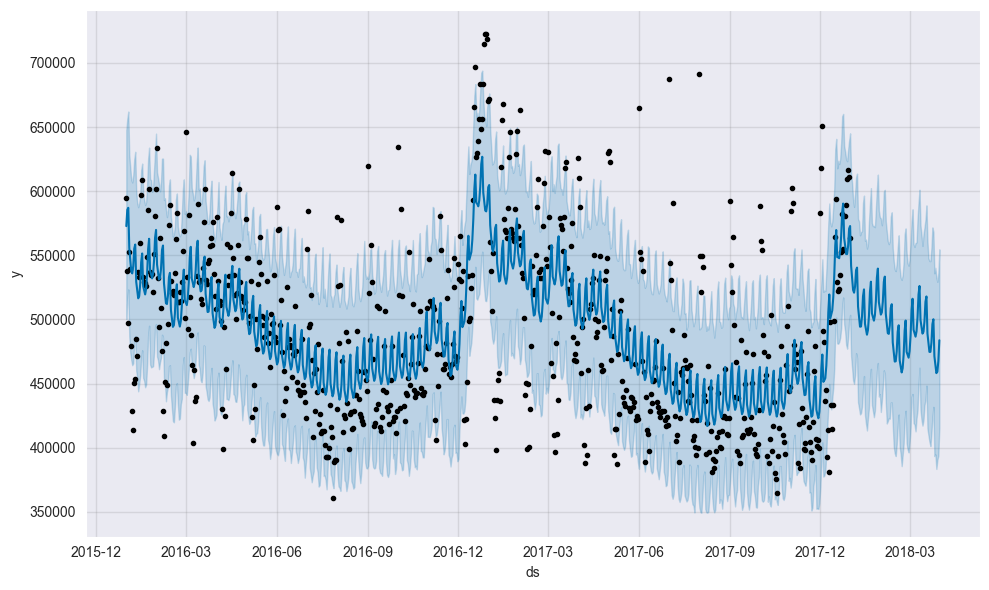

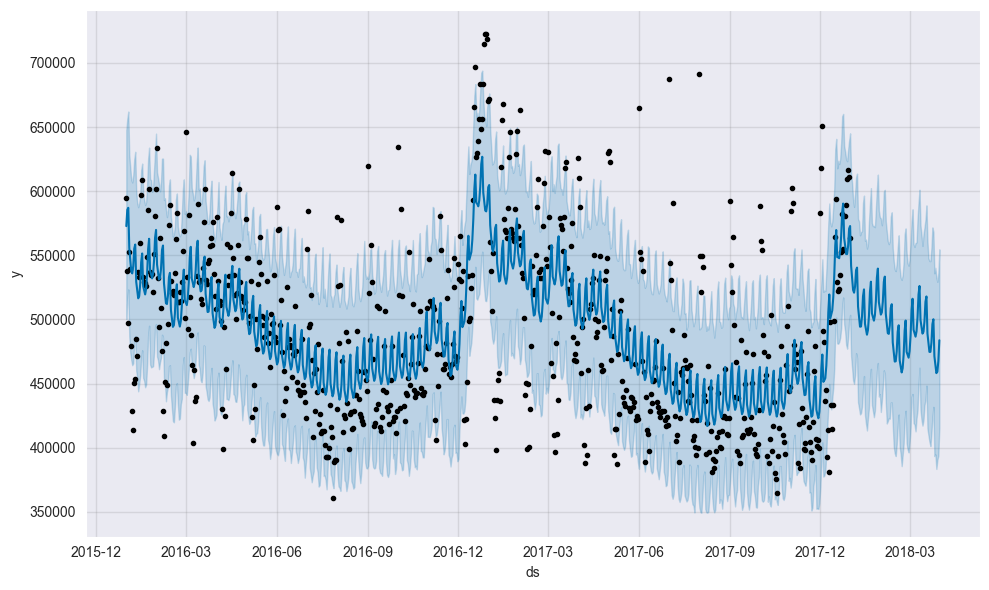

In [106]:
model.plot(forecast)

Here we can see the graph showing the forecasted DAU in the 90 days of Jan-March 2018.
We can see that the model kept the seasonality we can observe (new year seems to be big for WoT!)

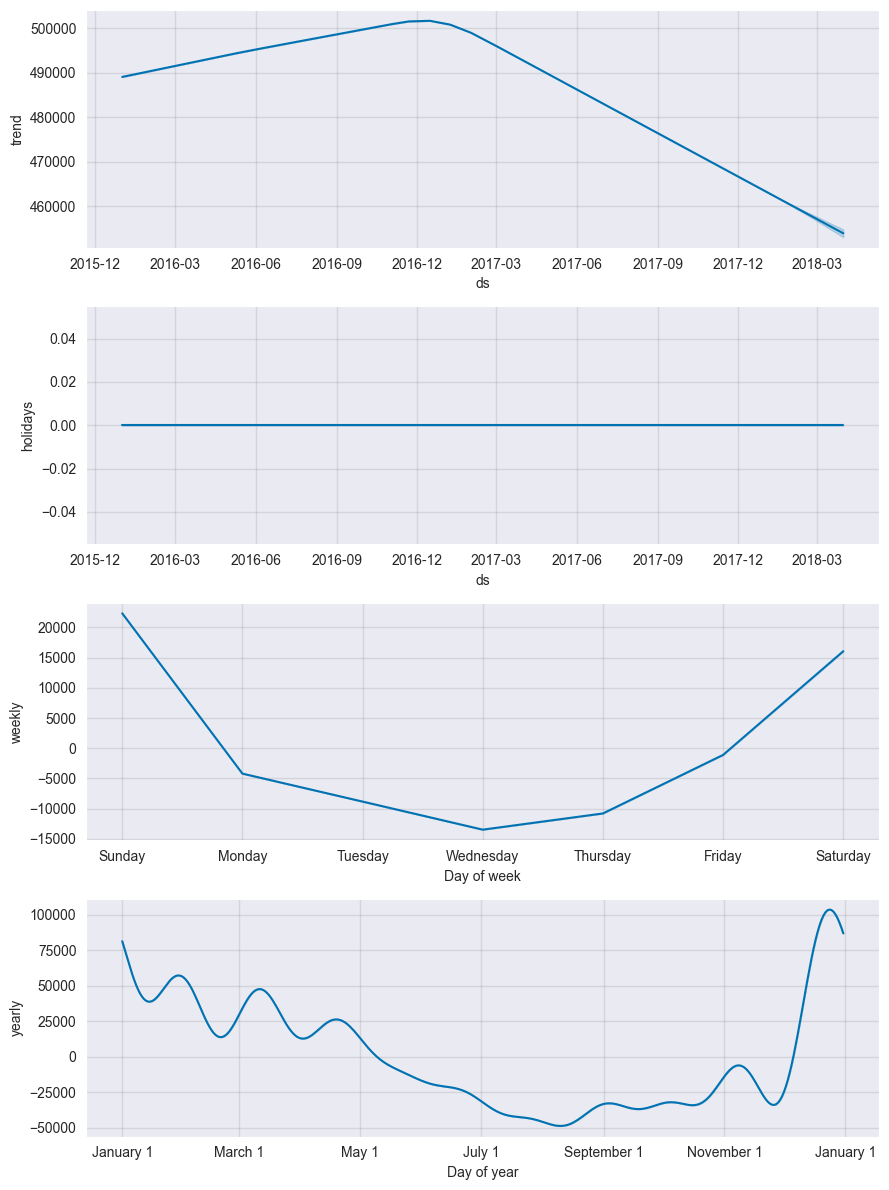

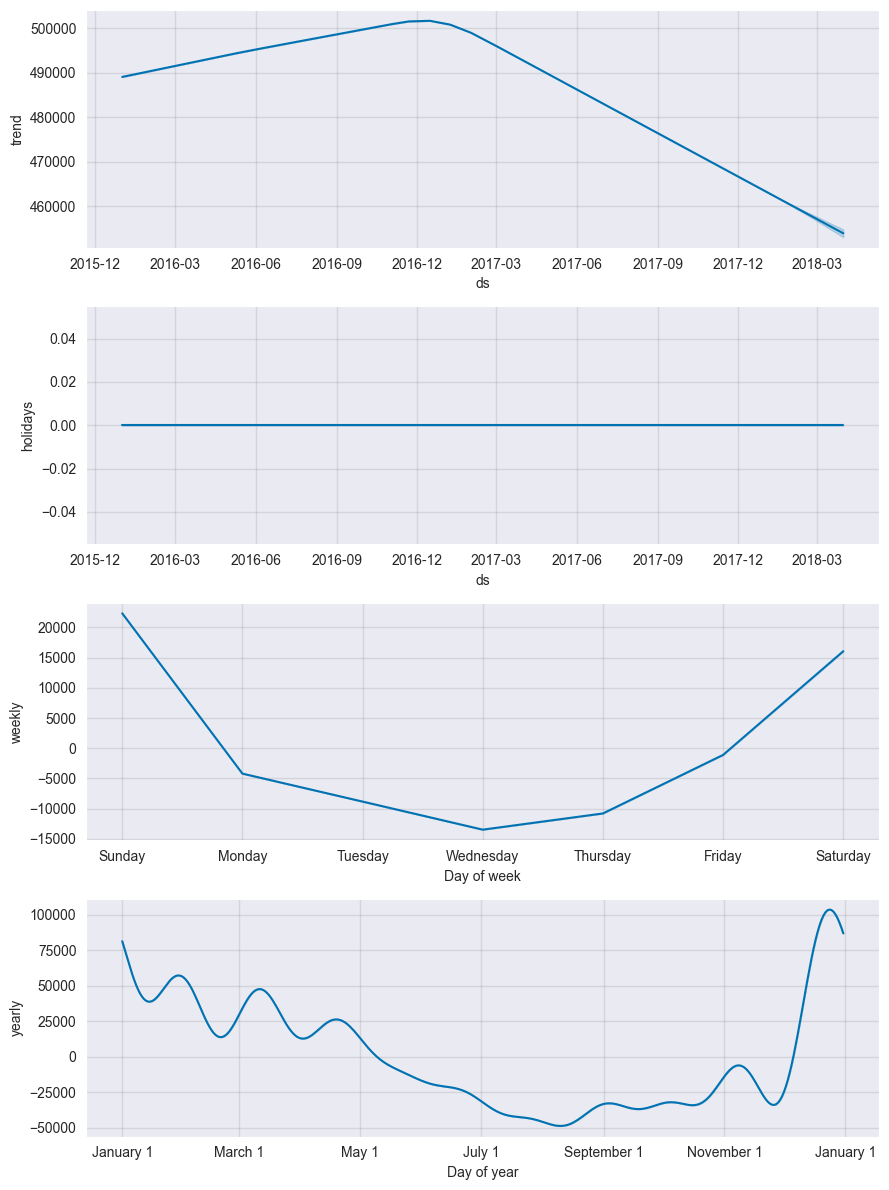

In [107]:
model.plot_components(forecast)

These graphs display the trend in user activity through time.

It is important to note that the holiday graph shows how holidays impact the DAUs compared to regular days, in this case holidays have little impact (but let's not forget I used French holidays as an example).

We can draw some interesting conclusions from these graphs, as we can see that the game is mainly being played on weekends and around christmas.

In [108]:
predicted_dau = forecast[forecast["ds"] >= "2018-01-01"][["ds", "yhat"]].reset_index()
print(predicted_dau)

    index         ds           yhat
0     731 2018-01-01  541846.722713
1     732 2018-01-02  532496.742709
2     733 2018-01-03  523023.345962
3     734 2018-01-04  520872.004195
4     735 2018-01-05  525822.715687
..    ...        ...            ...
85    816 2018-03-27  464646.697823
86    817 2018-03-28  458153.208325
87    818 2018-03-29  459249.067259
88    819 2018-03-30  467633.180315
89    820 2018-03-31  483782.081883

[90 rows x 3 columns]


We have here the predicted values for the period we wanted to forecast.